## End to End Rice Leaf quaity Prediction

### Importing few helper functions from github

> This helper functions would be helping us in unziping the data plotting the loss curves and much more....

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-12-30 05:11:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-30 05:11:40 (80.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



### Checking out what amouont of images our data has 

In [4]:
from helper_functions import unzip_data,walk_through_dir

In [5]:
walk_through_dir("/content/drive/MyDrive/Rice_Leaf_Data3/rice")

There are 2 directories and 0 images in '/content/drive/MyDrive/Rice_Leaf_Data3/rice'.
There are 4 directories and 0 images in '/content/drive/MyDrive/Rice_Leaf_Data3/rice/validation'.
There are 0 directories and 43 images in '/content/drive/MyDrive/Rice_Leaf_Data3/rice/validation/bacterial_leaf_blight'.
There are 0 directories and 42 images in '/content/drive/MyDrive/Rice_Leaf_Data3/rice/validation/blast'.
There are 0 directories and 39 images in '/content/drive/MyDrive/Rice_Leaf_Data3/rice/validation/brownspot'.
There are 0 directories and 65 images in '/content/drive/MyDrive/Rice_Leaf_Data3/rice/validation/Healthy'.
There are 4 directories and 0 images in '/content/drive/MyDrive/Rice_Leaf_Data3/rice/train'.
There are 0 directories and 79 images in '/content/drive/MyDrive/Rice_Leaf_Data3/rice/train/brownspot'.
There are 0 directories and 74 images in '/content/drive/MyDrive/Rice_Leaf_Data3/rice/train/Healthy'.
There are 0 directories and 53 images in '/content/drive/MyDrive/Rice_Leaf

## Dividing the dataset into training and testing dataset

In [6]:
train_dir="/content/drive/MyDrive/Rice_Leaf_Data3/rice/train"
test_dir="/content/drive/MyDrive/Rice_Leaf_Data3/rice/validation"

## Setting up the input data layers 

> **Note:** The below two layers will be setting the `image size` , `label_mode`,...

Which will be helping us perform many good operations on our datset

In [7]:
import tensorflow as tf
IMG_SIZE=(32,32)
tf.random.set_seed(42)
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical")

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              shuffle=False)

Found 259 files belonging to 4 classes.
Found 189 files belonging to 4 classes.


**Note:** Let's try not to let overfit our model

**Identification:** As we have got an accuracy of about 98% on the training data and an accuracy of about 10% on the testing data

**Solution:** 

            1. Try different modelling methods 

            2. add dropout layer

            3. add earlystopping callback

## Model Building 

> **Note:** Steps to be followed:
1. Create a model which compulsarily contains input andx output layer.
2. Compile the model with (loss="categorical_crossentropy")
3. Fit the model on the training data by setting the required number of epochs.

## Building model1
> Note: This model contains early stopping layer which will restrict the epochs to stop early 

> Model checkpoint callback which will store every weight of our model 

> Contains few Convalutionary layer and Dense layers 

In [8]:
import tensorflow as tf

early_stopping_callback=tf.keras.callbacks.EarlyStopping(monitor="val_loss",mode="min",patience=7)
path="Model1_Results.hdf5"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(path,save_best_only=True,monitor="val_loss",mode="min")

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D,Activation,MaxPooling2D,Flatten,Dropout
model1=tf.keras.Sequential()
model1.add(Conv2D(200,(3,3),input_shape=(32,32,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(200,(3,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dropout(0.5))

model1.add(Dense(4,activation="softmax"))

model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

# Fit the model
model1.fit(train_data,
           epochs=20,
           validation_data=test_data,
           callbacks=[early_stopping_callback,model_checkpoint])

Epoch 1/20
9/9 [==============================] - 125s 11s/step - loss: 58.7004 - accuracy: 0.3591 - val_loss: 13.8500 - val_accuracy: 0.4339
Epoch 2/20
9/9 [==============================] - 12s 918ms/step - loss: 7.5763 - accuracy: 0.4208 - val_loss: 3.5686 - val_accuracy: 0.3810
Epoch 3/20
9/9 [==============================] - 12s 865ms/step - loss: 2.0296 - accuracy: 0.5521 - val_loss: 1.2489 - val_accuracy: 0.4974
Epoch 4/20
9/9 [==============================] - 15s 914ms/step - loss: 0.7993 - accuracy: 0.6602 - val_loss: 1.1690 - val_accuracy: 0.5238
Epoch 5/20
9/9 [==============================] - 10s 620ms/step - loss: 0.7319 - accuracy: 0.6988 - val_loss: 1.3597 - val_accuracy: 0.4974
Epoch 6/20
9/9 [==============================] - 10s 614ms/step - loss: 0.7092 - accuracy: 0.6873 - val_loss: 1.5370 - val_accuracy: 0.5344
Epoch 7/20
9/9 [==============================] - 10s 607ms/step - loss: 0.7073 - accuracy: 0.7220 - val_loss: 1.3507 - val_accuracy: 0.5185
Epoch 8/20
9

In [ ]:
model1.evaluate(test_data)

6/6 [==============================] - 5s 767ms/step - loss: 4.0952 - accuracy: 0.3598


[4.095195293426514, 0.35978835821151733]

In [11]:
model1.save("model1.h5")

### Building model2

Model Description:

> This contains few more extra Convolutionary and Dense layers than the previous model.

> Contains extra hidden neurons than the previous.

In [ ]:
import tensorflow as tf

early_stopping_callback=tf.keras.callbacks.EarlyStopping(monitor="val_loss",mode="min",patience=7)
path="Model1_Results.hdf5"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(path,save_best_only=True,monitor="val_loss",mode="min")

In [ ]:
model2=tf.keras.models.Sequential([
                                        tf.keras.layers.Flatten(input_shape=(32,32,1)),
                                        tf.keras.layers.Dense(64,activation="relu"),
                                        tf.keras.layers.Dense(64,activation="relu"),
                                        tf.keras.layers.Dense(32,activation="relu"),
                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.Dense(4,activation="softmax")
                                        ])


# Compiling the model
model2.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

# Fit the model
history_model_2=model2.fit(train_data,
                           validation_data=test_data,
                           epochs=30,
                           callbacks=[early_stopping_callback,model_checkpoint])

Epoch 1/30
9/9 [==============================] - 11s 668ms/step - loss: 7643.4492 - accuracy: 0.2625 - val_loss: 7140.7456 - val_accuracy: 0.2275
Epoch 2/30
9/9 [==============================] - 10s 656ms/step - loss: 5064.4912 - accuracy: 0.3089 - val_loss: 2183.5713 - val_accuracy: 0.2381
Epoch 3/30
9/9 [==============================] - 10s 648ms/step - loss: 1976.6113 - accuracy: 0.3900 - val_loss: 554.2924 - val_accuracy: 0.5979
Epoch 4/30
9/9 [==============================] - 10s 622ms/step - loss: 1166.1433 - accuracy: 0.3861 - val_loss: 967.7537 - val_accuracy: 0.5344
Epoch 5/30
9/9 [==============================] - 10s 650ms/step - loss: 982.4500 - accuracy: 0.4054 - val_loss: 480.1682 - val_accuracy: 0.4021
Epoch 6/30
9/9 [==============================] - 10s 617ms/step - loss: 697.7696 - accuracy: 0.4595 - val_loss: 480.3999 - val_accuracy: 0.5979
Epoch 7/30
9/9 [==============================] - 10s 624ms/step - loss: 397.6836 - accuracy: 0.5830 - val_loss: 834.0212 - 

## Building Model3

In [ ]:
path2="Model3_Results.hdf5"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(path2,save_best_only=True,monitor="val_loss",mode="min")

In [10]:
inputs=tf.keras.layers.Input(shape=(32,32,1))
x=tf.keras.layers.Conv2D(100,kernel_size=3,activation="relu")(inputs)
x=tf.keras.layers.MaxPooling2D()(x)

x=tf.keras.layers.Conv2D(200,kernel_size=3,activation="relu")(x)
x=tf.keras.layers.MaxPooling2D()(x)

x=tf.keras.layers.Conv2D(300,kernel_size=3,activation="relu")(x)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dropout(0.2)(x)
# x=tf.keras.layers.Flatten()(x)
# x=tf.keras.layers.Dropout(0.2)(x)

outputs=tf.keras.layers.Dense(4,activation="softmax")(x)
model3=tf.keras.Model(inputs,outputs)

model3.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [11]:
model3.fit(train_data,
           epochs=20,
           validation_data=test_data,
           callbacks=[early_stopping_callback,model_checkpoint])

Epoch 1/20


ValueError: ignored

In [ ]:
model3.evaluate(test_data)

6/6 [==============================] - 8s 1s/step - loss: 3.1862 - accuracy: 0.4021


[3.1861608028411865, 0.4021163880825043]

In [ ]:
path3="Model4_Results.hdf5"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(path3,save_best_only=True,monitor="val_loss",mode="min")

## Building Model4

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = tf.keras.Sequential([
                  preprocessing.RandomFlip("horizontal"),
                  preprocessing.RandomRotation(0.2),
                  preprocessing.RandomZoom(0.2),
                  preprocessing.RandomHeight(0.2),
                  preprocessing.RandomWidth(0.2),
                  # preprocessing.Rescale(1./255) # Keep for models like ResNet50V2 but EfficientNet's having rescaling buit-in

],name="data_augmentation")

In [ ]:
model_4=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                    kernel_size=3,
                                                    activation="relu",
                                                    input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2,
                                                       padding="valid"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(4,activation="sigmoid")])

model_4.compile(optimizer="adam",
                metrics=["accuracy"],
                loss="binary_crossentropy")


In [ ]:
# Fit the model
history_3=model_4.fit(train_data,
                      epochs=20,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks=[early_stopping_callback])  

Epoch 1/20
9/9 [==============================] - 15s 763ms/step - loss: 4.5393 - accuracy: 0.2201 - val_loss: 1.2734 - val_accuracy: 0.4392
Epoch 2/20
9/9 [==============================] - 11s 678ms/step - loss: 0.6414 - accuracy: 0.6293 - val_loss: 0.5851 - val_accuracy: 0.4921
Epoch 3/20
9/9 [==============================] - 11s 683ms/step - loss: 0.3966 - accuracy: 0.7799 - val_loss: 0.5827 - val_accuracy: 0.4497
Epoch 4/20
9/9 [==============================] - 11s 687ms/step - loss: 0.3116 - accuracy: 0.8726 - val_loss: 0.5635 - val_accuracy: 0.5026
Epoch 5/20
9/9 [==============================] - 11s 698ms/step - loss: 0.2141 - accuracy: 0.8880 - val_loss: 0.6199 - val_accuracy: 0.4762
Epoch 6/20
9/9 [==============================] - 11s 686ms/step - loss: 0.1475 - accuracy: 0.9382 - val_loss: 0.7834 - val_accuracy: 0.4074
Epoch 7/20
9/9 [==============================] - 11s 776ms/step - loss: 0.1006 - accuracy: 0.9498 - val_loss: 0.8898 - val_accuracy: 0.4444
Epoch 8/20
9/

## Making predictions 

In [ ]:
import tensorflow as tf
import io
def load_and_prep(filename,img_shape=224,scale=False):
  # reading the image
  img=tf.io.read_file(filename)

  # Decode the image into tensors
  img=tf.image.decode_image(img)

  # Resize the image 
  img=tf.image.resize(img,[img_shape,img_shape])

  # Scale yes/no?
  img=img/255.
 
  return img

In [ ]:
class_names=train_data.class_names
import matplotlib.pyplot as plt
import numpy as np

def pred_and_plot(model,filename,class_names=class_names):
  # Import the target image and preprocess it.
  img=load_and_prep(filename)

  # Make predictions 
  pred=model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class=class_names[int(np.argmax(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False);

In [ ]:
!wget https://raw.githubusercontent.com/Adwait01-Bhosale/Rice_Leaf/master/blast_leaf.jpg

--2021-12-28 13:13:02--  https://raw.githubusercontent.com/Adwait01-Bhosale/Rice_Leaf/master/blast_leaf.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-12-28 13:13:02 ERROR 404: Not Found.



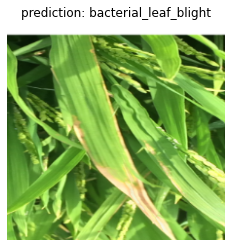

In [ ]:
pred_and_plot(model3,"/content/drive/MyDrive/Rice_Leaf_Data3/rice/validation/bacterial_leaf_blight/blight_rotated_016.png")

In [ ]:
!wget https://raw.githubusercontent.com/Adwait01-Bhosale/Rice_Leaf/master/healthy_rice_leaf.jpg

--2021-12-28 13:13:08--  https://raw.githubusercontent.com/Adwait01-Bhosale/Rice_Leaf/master/healthy_rice_leaf.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6827 (6.7K) [image/jpeg]
Saving to: ‘healthy_rice_leaf.jpg’

healthy_rice_leaf.j 100%[===================>]   6.67K  --.-KB/s    in 0s      

2021-12-28 13:13:08 (36.9 MB/s) - ‘healthy_rice_leaf.jpg’ saved [6827/6827]



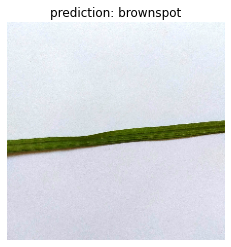

In [ ]:
pred_and_plot(model3,"/content/drive/MyDrive/Rice_Leaf_Data3/rice/train/Healthy/IMG_20190419_162233.jpg")

In [ ]:
model3.save("model_best.h5")

In [ ]:
model_json = model3.to_json()
with open("model3.json", "w") as json_file:
   json_file.write(model_json)
model3.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk
